# Ex
### Exercise 4.1
- 1, 2, 14, 15, 30, 42, 46

### Exercise 4.2
- 4, 6, 13, 14, 15, 16

### Exercise 4.3
- 3, 4, 9, 10, 12, 13, 20, 24

# Com Ex
### Computer Exercise 4.1
- 1, 3

### Computer Exercise 4.2
- 1, 9

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
#4.1 - 1

def newton_interpolation(x, y, x0):
    n = len(x)
    a = np.zeros(n)
    for i in range(n):
        a[i] = y[i]
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = (a[i] - a[i-1]) / (x[i] - x[i-j])
    p = a[n-1]
    for i in range(n-2, -1, -1):
        p = p * (x0 - x[i]) + a[i]
    return p

x = np.array([1, 2, 3, -4, 5])
y = np.array([2, 48, 272, 1182, 2262])

newton_interpolation(x, y, -1)

np.float64(12.0)

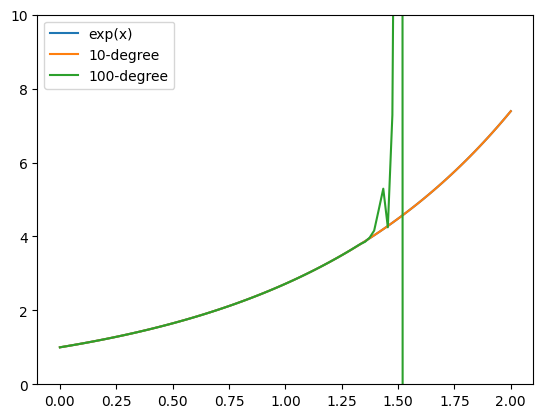

In [21]:
#4.1 - 3
def newton_interpolation_coeff(x, f):
    n = len(x)
    a = np.zeros(n)
    for i in range(n):
        a[i] = f(x[i])
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = (a[i] - a[i-1]) / (x[i] - x[i-j])
    return a

def calculate_polynomial(x0, x, a):
    n = len(x)
    p = a[n-1]
    for i in range(n-2, -1, -1):
        p = p * (x0 - x[i]) + a[i]
    return p

x1 = np.linspace(0, 2, 10)
x2 = np.linspace(0, 2, 100)
y = np.exp(x2)

a1 = newton_interpolation_coeff(x1, np.exp)
r1 = [calculate_polynomial(x0, x1, a1) for x0 in x2]
a2 = newton_interpolation_coeff(x2, np.exp)
r2 = [calculate_polynomial(x0, x2, a2) for x0 in x2]

plt.plot(x2, y, label='exp(x)')
plt.plot(x2, r1, label='10-degree')
plt.plot(x2, r2, label='100-degree')
plt.ylim(0, 10)
plt.legend()

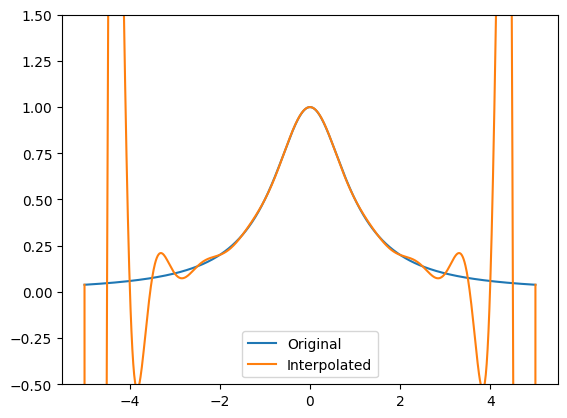

In [31]:
#4.2 - 1
def newton_interpolation_coeff(x, f):
    n = len(x)
    a = np.zeros(n)
    for i in range(n):
        a[i] = f(x[i])
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = (a[i] - a[i-1]) / (x[i] - x[i-j])
    return a

def calculate_polynomial(x0, x, a):
    n = len(x)
    p = a[n-1]
    for i in range(n-2, -1, -1):
        p = p * (x0 - x[i]) + a[i]
    return p

f = lambda x: 1 / (1 + x**2)
x = np.linspace(-5, 5, 21)
a = newton_interpolation_coeff(x, f)
y = [calculate_polynomial(i, x, a) for i in np.linspace(-5, 5, 1000)]

plt.plot(np.linspace(-5, 5, 1000), f(np.linspace(-5, 5, 1000)), label='Original')
plt.plot(np.linspace(-5, 5, 1000), y, label='Interpolated')
plt.ylim(-0.5, 1.5)
plt.legend()
plt.show()

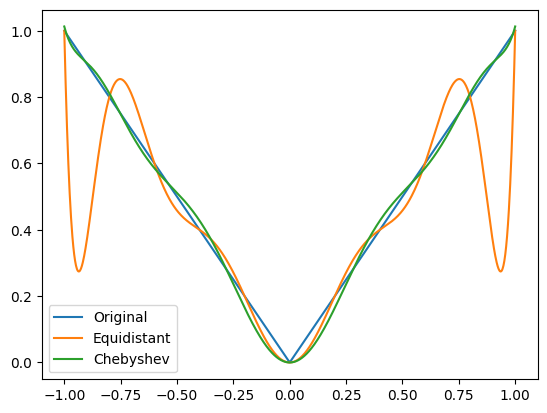

In [30]:
#4.2 - 9
def newton_interpolation_coeff(x, f):
    n = len(x)
    a = np.zeros(n)
    for i in range(n):
        a[i] = f(x[i])
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = (a[i] - a[i-1]) / (x[i] - x[i-j])
    return a

def calculate_polynomial(x0, x, a):
    n = len(x)
    p = a[n-1]
    for i in range(n-2, -1, -1):
        p = p * (x0 - x[i]) + a[i]
    return p

def chebyshev_nodes(n):
    return [np.cos((2 * i + 1) * np.pi / (2 * n)) for i in range(n)]

f = np.abs
x = np.linspace(-1, 1, 1000)
x1 = np.linspace(-1, 1, 11)
x2 = chebyshev_nodes(11)

a1 = newton_interpolation_coeff(x1, f)
a2 = newton_interpolation_coeff(x2, f)
y1 = [calculate_polynomial(i, x1, a1) for i in x]
y2 = [calculate_polynomial(i, x2, a2) for i in x]

plt.plot(x, f(x), label='Original')
plt.plot(x, y1, label='Equidistant')
plt.plot(x, y2, label='Chebyshev')
plt.legend()
plt.show()